# Exploratory Data Analysis (Visual)

## Histograms

In [0]:
df=spark.read.csv('2008_swing_states.csv',header=True)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df.show(2)

+-----+---------------+-----------+---------+---------+---------+
|state|         county|total_votes|dem_votes|rep_votes|dem_share|
+-----+---------------+-----------+---------+---------+---------+
|   PA|    Erie County|     127691|    75775|    50351|    60.08|
|   PA|Bradford County|      25787|    10306|    15057|    40.64|
+-----+---------------+-----------+---------+---------+---------+
only showing top 2 rows



In [0]:
pandas_df=df.toPandas()#pandas version of the dataframe

In [0]:
pandas_df.head(2)

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64


Text(0.5, 1.0, '2008 Swing Democrats')

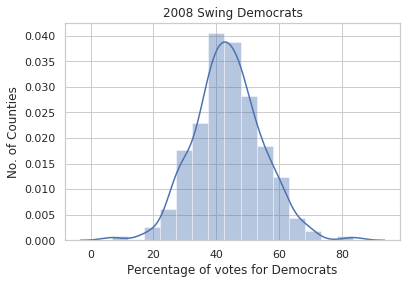

In [0]:
import numpy as np
#sns.set(style='whitegrid')
sns.distplot(pandas_df.dem_share,bins=15)#square root rule for histogram bins
plt.xlabel('Percentage of votes for Democrats')
plt.ylabel('No. of Counties')
plt.title('2008 Swing Democrats')

## Empirical Cumulative Distribution Function

In [0]:
import numpy as np
x=np.sort(pandas_df['dem_share'])
x2=np.sort(pandas_df['rep_share'])
y=np.arange(1,len(x)+1)/len(x)#1 to n / n to get a scaling between 0 and 1

Text(0, 0.5, 'percentage of counties that voted')

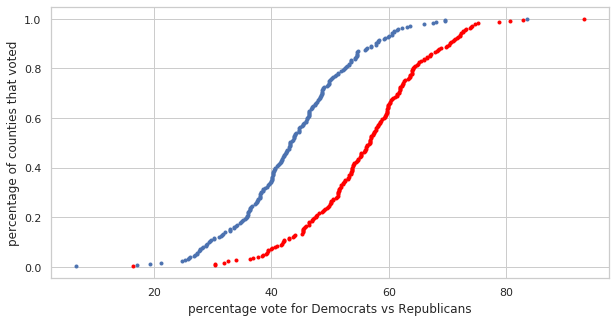

In [0]:
plt.figure(figsize=(10,5))
plt.plot(x,y,marker='.',linestyle='none')
plt.plot(x2,y,marker='.',linestyle='none',color='red')
plt.xlabel('percentage vote for Democrats vs Republicans')
plt.ylabel('percentage of counties that voted')

# Exploratory Data Analysis (Quantitative)

## Mean

In [0]:
pandas_df.describe()

,state,county,total_votes,dem_votes,rep_votes,dem_share
count,222,222,222,222,222,222
unique,3,187,221,222,222,219
top,OH,Franklin County,18802,334709,40164,35.86
freq,88,3,2,1,1,2


In [0]:
df.describe().show()

+-------+-----+------------+------------------+-----------------+-----------------+------------------+
|summary|state|      county|       total_votes|        dem_votes|        rep_votes|         dem_share|
+-------+-----+------------+------------------+-----------------+-----------------+------------------+
|  count|  222|         222|               222|              222|              222|               222|
|   mean| null|        null| 90424.51351351352|47214.28378378379|42236.56756756757| 43.76441441441444|
| stddev| null|        null|142285.29065340292|88913.07704554172|56208.86248990848|10.712770294984136|
|    min|   FL|Adams County|            100670|           102417|            10067|             17.06|
|    max|   PA| York County|             98047|            99586|             9900|             83.56|
+-------+-----+------------+------------------+-----------------+-----------------+------------------+



In [0]:
# mean value of total votes in pyspark dataframe
import pyspark.sql.functions as F
df.describe().select('summary','total_votes').where(F.col('summary')=='mean').show()

+-------+-----------------+
|summary|      total_votes|
+-------+-----------------+
|   mean|90424.51351351352|
+-------+-----------------+



## Quantile

In [0]:
list(df.selectExpr("percentile(total_votes, 0.95)").take(1)[0].asDict().items())[0][1]#percentile function in pyspark

422086.0999999999

In [0]:
pandas_df.total_votes.apply(lambda x:int(x)).quantile(0.95)#percentile in pandas

422086.0999999999

In [0]:
pandas_df.head(1)

,state,county,total_votes,dem_votes,rep_votes,dem_share,rep_share
0,PA,Erie County,127691.0,75775.0,50351.0,60.08,39.92


In [0]:
pandas_df.total_votes=pandas_df['total_votes'].apply(lambda x: float(x))
pandas_df.dem_votes=pandas_df['dem_votes'].apply(lambda x: float(x))
pandas_df.rep_votes=pandas_df['rep_votes'].apply(lambda x: float(x))
pandas_df.dem_share=pandas_df['dem_share'].apply(lambda x: float(x))
pandas_df['rep_share']=100-pandas_df.dem_share

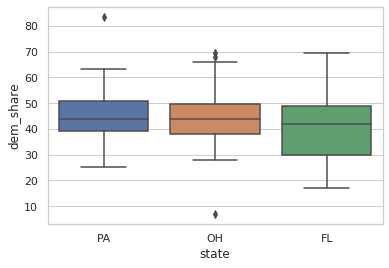

In [0]:
sns.boxplot(x='state',y='dem_share',data=pandas_df)

## Variance and Standard Deviation

In [0]:
for state in set(pandas_df.state):
  variance=np.var(pandas_df[pandas_df.state==state].dem_share)
  stddev=np.std(pandas_df[pandas_df.state==state].dem_share)
  print(state,'Variance:',variance,'\tStandard Deviation:',stddev)

OH Variance: 96.81207396694212 	Standard Deviation: 9.83931267756758
PA Variance: 94.66503492982848 	Standard Deviation: 9.729595825615187
FL Variance: 147.44278618846064 	Standard Deviation: 12.142602117687158


## Covariance and the Pearson Correlation Coefficient

In [0]:
pandas_df.head(1)

,state,county,total_votes,dem_votes,rep_votes,dem_share,rep_share
0,PA,Erie County,127691.0,75775.0,50351.0,60.08,39.92


Text(0, 0.5, 'Percentage of Votes for Democrats')

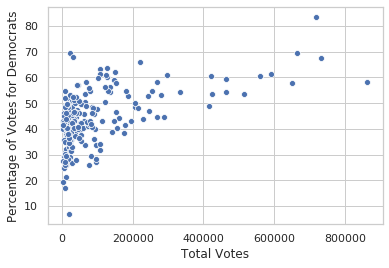

In [0]:
sns.scatterplot(pandas_df.total_votes,pandas_df.dem_share)
plt.xlabel('Total Votes')
plt.ylabel('Percentage of Votes for Democrats')

In [0]:
x=np.array([1,2,3,4,5])
y=x**2

In [0]:
np.cov(x,y)#[0,0] is variance in x [1,1] is the variance in y and both [0,1] and [1,0] give us the covariance

array([[ 2.5, 15. ],
       [15. , 93.5]])

In [0]:
np.corrcoef(x,y)# here [0,1] and [1,0] denote the correlation between x and y. Correlation can be thought of covariance scaled between -1 and 1

array([[1.        , 0.98110491],
       [0.98110491, 1.        ]])

# Probabalistic Logic - Discete Variables

In [0]:
import numpy as np

## Simulation 1 : Coin Toss

In [0]:
np.random.seed(666)#pseudo random number generator
np.random.random()#randomly generates a number between 0 and 1. If less than 0.5 then tails else heads.

0.7004371218578347

In [0]:
#this is called a bernoulli trial since the outcome is either true or false

In [0]:
random_numbers=np.random.random(size=4)
heads=random_numbers>0.5
heads

array([ True, False,  True, False])

In [0]:
head_counts=0
for _ in range(1000):
  trial=np.random.random(size=4)
  result=np.sum(trial>0.5)
  if result==4:
    #print(trial>0.5)
    head_counts+=1
print(head_counts/1000)

0.067


In [0]:
#actual probability is 0.5**4
print(0.5**4)#close enough

0.0625


In [0]:
# for number of successes r, number of bernoulli trials n and a probability of success at p; the set of outcomes are BINOMIALLY DISTRIBUTED.

In [0]:
np.random.binomial(4,0.5,size=10)# n is 4, p=0.5 and times experiment is repeated is size. Each number in the result tells us how many heads we got in each experiment.

array([1, 2, 3, 2, 3, 3, 3, 2, 2, 3])

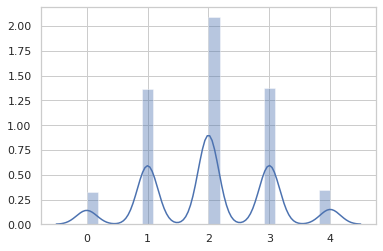

In [0]:
sns.distplot(np.random.binomial(4,0.5,size=10000))# this is what a binomial distribution looks like.

In [0]:
#the graph tells us that that getting 2 heads in a series of 4 consecutive coin tosses is most likely

In [0]:
#Lets say that I'm playing russian roulette alone and the probability i'll get shot is 1/6 (1 bullet in a 6 shot gun)
# every time I play, the revolver is spun ( I know those aren't the rules).

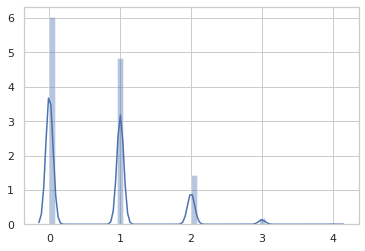

In [0]:
sns.distplot(np.random.binomial(4,0.1666,size=1000000))# If I play 4 turns

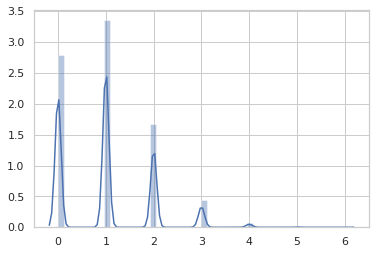

In [0]:
#so things look pretty good if I only play 4 turns
# what if I play 6 turns?
sns.distplot(np.random.binomial(6,0.1666,size=1000000))# If I play 6 turns, I'm more likely to die. Stats save the day once again!

## Poisson Processes and the Poisson Distribution

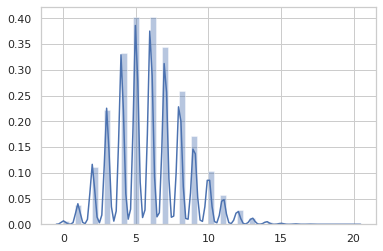

In [0]:
sns.distplot(np.random.poisson(lam=6,size=1000000))#lets say that the average number of hits on a website per hour is 6 (lambda)
# what is the most likely number of hits? 5-6

# Probabalistic Logic - Continuous Variables

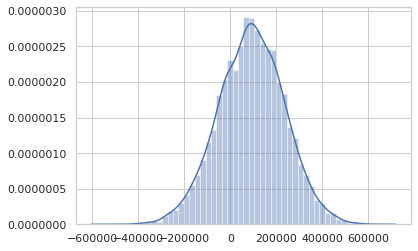

In [0]:
#normal distribution
sns.distplot(np.random.normal(np.mean(pandas_df.total_votes),np.std(pandas_df.total_votes),size=10000))